<a href="https://colab.research.google.com/github/Mansoldo/Kmeans_IGTI/blob/master/IGTI_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Realizando a importação das bibliotecas necessárias**

1. KMeans --> Algoritmo de cluster
2. make_blobs --> geração de massa teste
3. pyplot --> geração (plotagem) dos gráficos
4. pandas --> usado para exibir uma tabela


In [0]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

**Definição dos valores especificados pelo exercício**


In [0]:
#Definindo os valores a serem usados no make_blobs
v_n_samples = 500
v_centers = 20
v_random_state = 999

#Definição dos valores para usar o Kmeans
v_max_iter = 300
v_n_init = 10
v_init = 'k-means++'

**Gerando dados aleatórios e plotando a situação inicial**

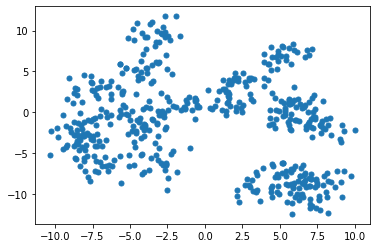

In [5]:
data,y = make_blobs(n_samples = v_n_samples, centers=v_centers, random_state = v_random_state)

plt.scatter(data[:,0], data[:,1], s=25)
plt.show()

**Gerando um vetor com as distâncias quadráticas com n clusters**

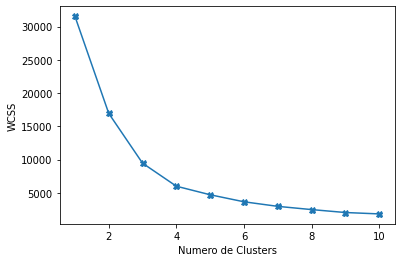

,wcss
1,31547.372471
2,16949.214472
3,9464.847251
4,6005.101775
5,4717.404092
6,3662.640329
7,2976.003898
8,2490.924278
9,2050.207131
10,1841.262856


In [9]:
wcss = [] 
 
for i in range(1, 11):
    kmeans = KMeans(init=v_init, max_iter = v_max_iter, n_init=v_n_init, n_clusters=i)
    kmeans.fit(data)
    wcss.append([kmeans.inertia_]) 
 
plt.plot(range(1, 11), wcss, marker="X")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show() #plota o gráfico 
 
pd.DataFrame(wcss,  range(1,11), columns=['wcss']) #monta a tabela

**Realizando o processamento (clusterização) com o número de clusters obtido a partir do método de elbow**

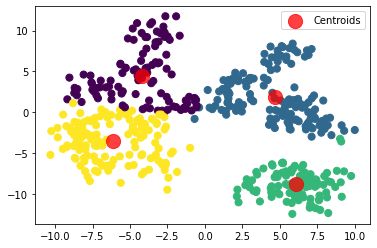

In [17]:
kmeans = KMeans(init=v_init, max_iter=v_max_iter, n_init=v_n_init, n_clusters=4)

result = kmeans.fit(data)
centers = kmeans.cluster_centers_

plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75, label='Centroids');
plt.legend()
plt.show()

# Respostas

Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?

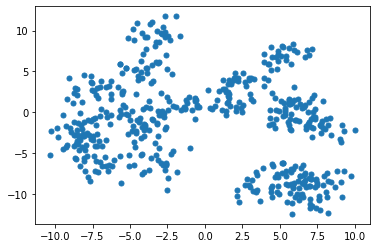

In [18]:
x,y = make_blobs(n_samples=500, centers=20, random_state=999)

data = x

plt.scatter(data[:,0], data[:,1], s=25)
plt.show()

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [20]:
kmeans = KMeans(init = v_init, max_iter = v_max_iter, n_init = v_n_init, n_clusters = 5)
kmeans.fit(data)
kmeans.inertia_

4717.404091931214

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

In [21]:
kmeans = KMeans(init = v_init, max_iter = v_max_iter, n_init = v_n_init, n_clusters = 1)

result = kmeans.fit(data)
centers = kmeans.cluster_centers_

centers


array([[ 0.02618523, -1.30384304]])

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [22]:
kmeans = KMeans(init=v_init, max_iter = v_max_iter, n_init=v_n_init, n_clusters=1)

kmeans.fit(data)
kmeans.inertia_

31547.372471390485